# Plots for Digit Network

## Load Digits and Network

In [1]:
%load_ext autoreload
#nice magic to reload modules without kernelrestart
%autoreload 2
# packages not excluded by aimport -<name> are reloaded everytime code is executed! 

import sys
%aimport -sys
import os
%aimport -os
print('Current working directory:', os.getcwd())

import numpy as np
%aimport -numpy
from timeit import default_timer as timer
%aimport -default_timer
%matplotlib notebook
# or use "inline" instead
import matplotlib.pyplot as plt
%aimport -matplotlib.pyplot


# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
path_to_academia_ai = os.path.join(os.pardir, os.pardir)
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import academia_ai as ai
#%aimport

Current working directory: /Users/Dino/Dropbox/Academia2016/academia_AI/academia_ai/examples
Reloaded leafs!
Reloaded preprocessing!
Reloaded plotting!


<IPython.core.display.Javascript object>


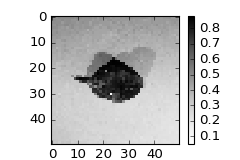

In [2]:
if 1:    
    #load data --> create a training and a testing list
    path = '../leafs/data/50x50/'
    data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = True)
    trainset1 = data[0]
    testset1 = data[1]
    #optinal nomalization
    #ai.preprocessing.normalize(trainset1)
    #ai.preprocessing.normalize(testset1)

    #take from training and testing only the matrixes, not the whole object "leaf"
    training_images1 = [np.array(leaf.image) for leaf in trainset1]
    training_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset1]
    test_images1 = [np.array(leaf.image) for leaf in testset1]
    test_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in testset1]

    # Plot of an example image
    if 1:
        plt.figure(figsize=(3,2))
        plt.imshow(training_images1[0], cmap='Greys', interpolation='none')
        plt.colorbar()

In [3]:
path = 'data/leafnet3_50x50_withNz_20170208_byAm_V1.pkl'
net_trained = ai.ConvolutionalNeuralNet.load(path)

<IPython.core.display.Javascript object>


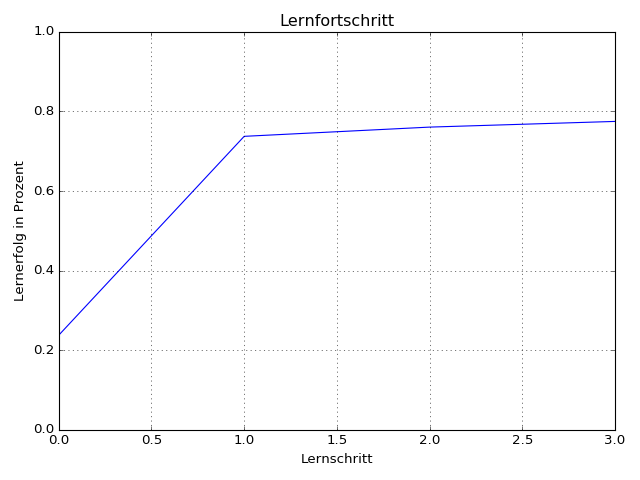

0.2007233273056058

In [4]:
# Check probability for successful identification
net_trained.plott_lernSuccess(plt)
net_trained.test_net(test_images1,test_solutions1)

## Various Plots

### Forward propagation - plot outputs of each layer

In [6]:
path = '../leafs/data/50x50/'
data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = False)
trainset = data[0]
trainset2 = data[0]
index = 1200

#rawdata
images = [np.array(leaf.image) for leaf in trainset]
solutions_plot = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset]
lea_1 = images[index]

#normalized
ai.preprocessing.normalize(trainset2)
images2 = [np.array(leaf.image) for leaf in trainset2]
solutions2 = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset2]
lea_2 = images2[index]

sol = solutions_plot[index]
result = net_trained.forward_prop(lea_2, save_intermediate=True)
intermediate = net_trained.intermediate_results
net_trained.success_list[3]

0.775

#### Input Image

<IPython.core.display.Javascript object>


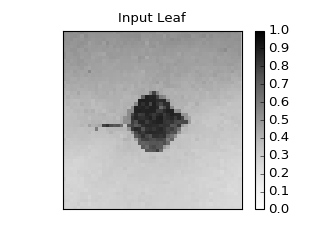

In [7]:
fig = plt.figure(figsize=(4,3))
ax = plt.gca()
im = plt.imshow(lea_1, cmap='Greys', vmin=0, vmax=1, interpolation='none')
plt.suptitle('Input Leaf', fontsize=12, x=0.475, y=0.95)
plt.colorbar()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout(pad=1.8, h_pad=None, w_pad=None)
#plt.savefig('l_one.png', dpi=300)

#### Preprocessed Digit

<IPython.core.display.Javascript object>


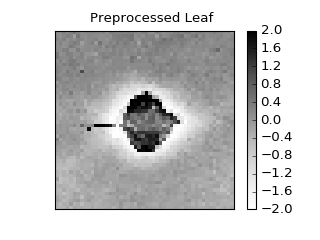

In [8]:
fig = plt.figure(figsize=(4,3))
ax = plt.gca()
im = plt.imshow(lea_2, cmap='Greys', vmin=-2, vmax=2, interpolation='none')
plt.suptitle(r'Preprocessed Leaf', fontsize=12, x=0.475, y=0.95)
plt.colorbar()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout(pad=1.8, h_pad=None, w_pad=None)
#plt.savefig('l_two.png', dpi=300)

#### Layer 1 - Convolution

<IPython.core.display.Javascript object>


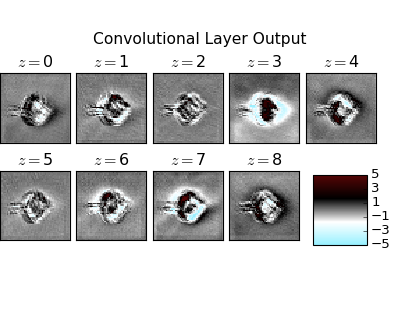

In [9]:
fig = plt.figure(figsize=(5, 4))
fig.suptitle('Convolutional Layer Output', fontsize=14, x=0.5, y=0.90)
gs = gridspec.GridSpec(2, 5)
for x in range(5):
    for y in range(2):
        if x+5*y == 9:
            continue
        ax = plt.subplot(gs[y, x])
        im = plt.imshow(intermediate[1][x+5*y], cmap=custom_cmap, vmin=-5, vmax=5, interpolation='none')
        ax.set_title('$z=$'+str(x+5*y))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
colax = plt.subplot(gs[1, 4])
axarr = fig.get_axes()
diff = np.array(axarr[7].get_position().bounds) - np.array(axarr[5].get_position().bounds)
cb_pos = np.array(axarr[7].get_position().bounds) + diff
cb = plt.colorbar(im, cax=colax)
cb.set_ticks([-5, -3, -1, 1, 3, 5])
gs.tight_layout(fig, pad=0, h_pad=-7, w_pad=0.5, rect=None )
colax.set_position(cb_pos - [-0.017, -0.1350, 0.0004, 0.1445])
#plt.savefig('l_three.png', dpi=300)

#### Layer 2 - Hyperbolic tangent

<IPython.core.display.Javascript object>


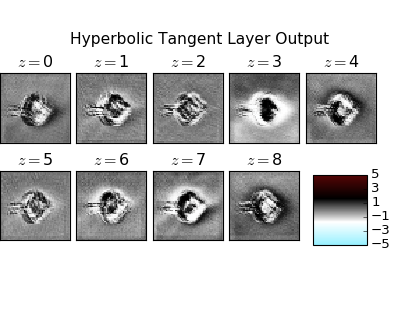

In [10]:
fig = plt.figure(figsize=(5, 4))
fig.suptitle('Hyperbolic Tangent Layer Output', fontsize=14, x=0.5, y=0.90)
gs = gridspec.GridSpec(2, 5)
for x in range(5):
    for y in range(2):
        if x+5*y == 9:
            continue
        ax = plt.subplot(gs[y, x])
        im = plt.imshow(intermediate[2][x+5*y], cmap=custom_cmap, vmin=-5, vmax=5, interpolation='none')
        ax.set_title('$z=$'+str(x+5*y))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
colax = plt.subplot(gs[1, 4])
axarr = fig.get_axes()
diff = np.array(axarr[7].get_position().bounds) - np.array(axarr[5].get_position().bounds)
cb_pos = np.array(axarr[7].get_position().bounds) + diff
cb = plt.colorbar(im, cax=colax)
cb.set_ticks([-5, -3, -1, 1, 3, 5])
gs.tight_layout(fig, pad=0, h_pad=-7, w_pad=0.5, rect=None )
colax.set_position(cb_pos - [-0.017, -0.1350, 0.0004, 0.1445])
#plt.savefig('l_four.png', dpi=300)

#### Layer 3 - Fully Connected classification layer

<IPython.core.display.Javascript object>


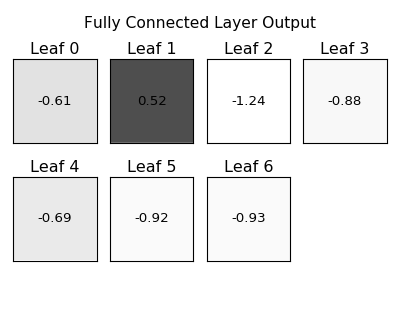

In [12]:
fig, axarr = plt.subplots(2, 4, figsize=(5,4))
plt.suptitle('Fully Connected Layer Output', fontsize=14, x=0.5, y=0.95)
axf = axarr.flatten()

for i in range(7):
    axf[i].imshow(result[i], cmap='Greys', vmin=-1, vmax=1, interpolation='none')
    axf[i].text(0, 0, str(round(result[i][0][0], 2)),horizontalalignment='center', verticalalignment='center')
    axf[i].set_title('Leaf '+str(i))
    axf[i].get_xaxis().set_visible(False)
    axf[i].get_yaxis().set_visible(False)
    
plt.delaxes(axf[7])
plt.tight_layout(pad=1, h_pad=-2.5)
#plt.savefig('l_five.png', dpi=300)

In [13]:
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))

Classified label: 1
Correct label: 1


### Track training progress

In [14]:
learned_digits = []
class_success = []

In [15]:
from itertools import cycle, islice
image_delivery = cycle(D.training_images)
solution_delivery = cycle(D.training_solutions)
def training_batch(n):
    tr = islice(image_delivery, n)
    so = islice(solution_delivery, n)
    return tr, so
def train_batch(n, rate=1e-5):
    tr, so = training_batch(int(n))
    net.train(tr, so, rate, 1)
    learned_digits.append(int(n))
    class_success.append(net.test_net(D.test_images, D.test_solutions))

NameError: name 'D' is not defined

In [16]:
n_iter = np.logspace(6.3, 6.5, num=2, endpoint=True, base=10.0, dtype=None)
for n in n_iter:
    train_batch(int(n))
    print(int(n), class_success[-1])

NameError: name 'train_batch' is not defined

In [11]:
n1 = np.logspace(0,5,20)
n2 = np.logspace(5.3,6,3)
n3 = np.logspace(6.3,6.5,2)
n_tot = np.hstack((n1,n2,n3))
print(n_tot.shape)
n_cumulative = np.cumsum(n_tot)

(25,)


In [12]:
plt.figure(figsize=(4,3))
plt.title('Network Training Progress')
plt.plot(np.log10(n_cumulative), class_success, 'bo-')
plt.xticks([0,1,2,3,4,5,6,7])
plt.ylim(0, 1)
plt.ylabel('Classification Success')
plt.xlabel('Learned Digits $\log_{10}(d)$')
plt.tight_layout()
#plt.savefig('training.png', dpi=300)

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension